In [202]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

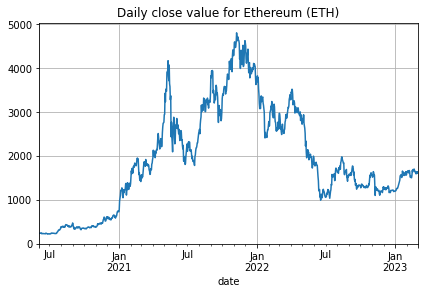

In [203]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='ETH', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for Ethereum (ETH)')
plt.grid()
plt.show()

In [204]:
data_eth = data['4b. close (USD)'][:760]
data_eth = data_eth.reindex(index=data_eth.index[::-1])

In [205]:
vols = data_eth.rolling(30).std()
vols

date
2021-01-31 NaN
2021-02-01 NaN
2021-02-02 NaN
2021-02-03 NaN
2021-02-04 NaN
 ... 
2023-02-25 57.658586
2023-02-26 57.665221
2023-02-27 56.993145
2023-02-28 56.906519
2023-03-01 56.024857
Name: 4b. close (USD), Length: 760, dtype: float64

In [206]:
vol_buckets = vols.loc[pd.date_range('2021-10-01','2023-02-01' , freq='1M')-pd.offsets.MonthBegin(1)]
vol_buckets

date
2021-10-01 351.318441
2021-11-01 320.283683
2021-12-01 221.573960
2022-01-01 194.741716
2022-02-01 416.319830
2022-03-01 198.679976
2022-04-01 303.786911
2022-05-01 204.218324
2022-06-01 329.476230
2022-07-01 309.524592
2022-08-01 225.508778
2022-09-01 152.292303
2022-10-01 162.814280
2022-11-01 114.186978
2022-12-01 157.238634
2023-01-01 40.329792
Name: 4b. close (USD), dtype: float64

In [207]:
data_change = data_eth.pct_change()
data_change

date
2021-01-31 NaN
2021-02-01 0.046947
2021-02-02 0.100206
2021-02-03 0.100948
2021-02-04 -0.041346
 ... 
2023-02-25 -0.008222
2023-02-26 0.029337
2023-02-27 -0.004819
2023-02-28 -0.017276
2023-03-01 0.019412
Name: 4b. close (USD), Length: 760, dtype: float64

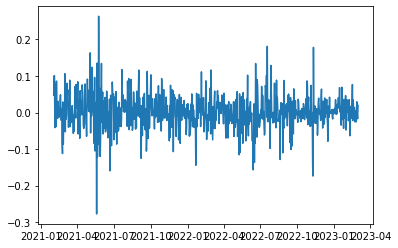

In [208]:
plt.plot(data_eth.pct_change())

In [209]:
data_dir = '/data/workspace_files/'
nft_data_path = data_dir+'NFT+Updated+data.csv'
whitelist_path = data_dir+'Whitelist - Sheet1.csv'

nft_data = pd.read_csv(nft_data_path, index_col=0)
whitelist = pd.read_csv(whitelist_path)

In [210]:
nft_data_processed = nft_data.drop_duplicates(['asset_contract', 'item_no', 'lender', 'loanStartTime', 'loanDueTime'])
print(nft_data_processed.count())
nft_data_processed

loanStartTime            12750
loanDueTime              12750
asset_contract           12750
item_no                  12750
status                   12750
loanPrincipalAmount      12750
amountPaidToLender       12750
APR                      12750
loanDuration             12750
lender                   12750
borrower                 12750
assetCategory            12749
loanERC20Denomination    12750
slug                     12750
starting_valuation       12750
ending_valuation         12750
LTV                      12750
dtype: int64


,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,borrower,assetCategory,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV
1063,2021-09-02 01:24:42,2021-10-02 01:24:42,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.520000,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xed50b7114a69c69cbbb9a38d234d1514fd952413,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.590,0.865389
1076,2021-09-02 18:36:45,2021-10-02 18:36:45,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.380000,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.500,0.227273
1086,2021-09-03 09:55:36,2021-09-10 09:55:36,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,3466,repaid,5.500,5.580165,80.00,7.0,0x88abb547673b28b89ac72b7c0dc1627d3f12b4d0,0x3f015b37cd324d3cbaaa075a75f8f0a9afeb04e1,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,13.8900,13.890,0.395968
1110,2021-09-09 12:20:39,2021-10-09 12:20:39,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.045000,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.850,0.324926
1125,2021-09-14 13:45:22,2021-09-21 13:45:22,0x85f740958906b317de6ed79663012859067e745b,2171,liquidated,0.200,0.000000,0.00,7.0,0x1b02eab42a1004a6210428c5740fcf0cbcb5ca6e,0x752184a2069c35f03d0216ba806013693740b285,TheWickedCraniums,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,thewickedcraniums,0.2500,0.350,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,2023-01-16 15:14:23,2023-02-15 15:14:23,0x80336ad7a747236ef41f47ed2c7641828a480baa,1922,escrow,0.800,0.000000,79.00,30.0,0x5b20dce335d131c6de0cc11b481ace2aade788df,0x77182f4f182432945b520e054d3a7b5ab2a83e22,Chimpers,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,chimpersnft,1.6950,1.695,0.471976
24862,2023-01-16 15:46:11,2023-01-30 15:46:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,8800,escrow,9.000,0.000000,50.00,14.0,0x503c284ca2aee317426642a697eeb09f1feccf41,0x031df53cb282498278f9974749642869f3ee2ba3,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,1.565217
24863,2023-01-16 15:54:11,2023-02-15 15:54:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,3989,escrow,4.511,0.000000,38.00,30.0,0xf3bbcda1c73281e461d2a3388ffa03807b3f98a2,0x77182f4f182432945b520e054d3a7b5ab2a83e22,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,0.784522
24864,2023-01-16 16:36:11,2023-02-15 16:36:11,0xccc441ac31f02cd96c153db6fd5fe0a2f4e6a68d,2440,escrow,1.700,0.000000,35.00,30.0,0xa76b00d8fe77807edc51a87dbceabb623701d9d7,0x50fec23ffb143fd9b71ed11337b2b04c1a35f5d5,FLUF World,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,fluf,3.0900,3.090,0.550162


<ipython-input-211-cc43483afbce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['loanDueDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanDueTime']).dt.date)
<ipython-input-211-cc43483afbce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['loanStartDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanStartTime']).dt.date)
<ipython-input-211-cc43483afbce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<AxesSubplot:>

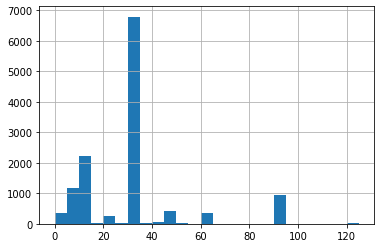

In [211]:
nft_data_processed['loanDueDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanDueTime']).dt.date)
nft_data_processed['loanStartDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanStartTime']).dt.date)
nft_data_processed['maturity'] = (nft_data_processed['loanDueDate'] - nft_data_processed['loanStartDate']).dt.days
nft_data_processed['maturity'].describe()
nft_data_processed['maturity'].hist(bins=25, range=(0,125))

In [212]:
# let's use 30 days as our pool duration, pay every 5 days
def get_first_of_month(date):
    return datetime(date.year, date.month, 1)

# use maturity here since maturity rounded the dates already
nft_data_processed['bucket'] = nft_data_processed['loanDueDate'].dt.to_period('M')
nft_data_processed['first_of_due_month'] = nft_data_processed['loanDueDate'].apply(get_first_of_month)
nft_data_clean = nft_data_processed[(nft_data_processed.maturity <= 30) & \
                                    (nft_data_processed.loanStartDate <= nft_data_processed['first_of_due_month']) & \
                                    (nft_data_processed.loanDueDate > nft_data_processed['first_of_due_month'])
                                   ]
nft_data_clean

<ipython-input-212-17e1b4a4e8e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['bucket'] = nft_data_processed['loanDueDate'].dt.to_period('M')
<ipython-input-212-17e1b4a4e8e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['first_of_due_month'] = nft_data_processed['loanDueDate'].apply(get_first_of_month)


,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,...,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV,loanDueDate,loanStartDate,maturity,bucket,first_of_due_month
1063,2021-09-02 01:24:42,2021-10-02 01:24:42,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.5200,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.590,0.865389,2021-10-02,2021-09-02,30,2021-10,2021-10-01
1076,2021-09-02 18:36:45,2021-10-02 18:36:45,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.3800,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.500,0.227273,2021-10-02,2021-09-02,30,2021-10,2021-10-01
1110,2021-09-09 12:20:39,2021-10-09 12:20:39,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.0450,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.850,0.324926,2021-10-09,2021-09-09,30,2021-10,2021-10-01
1139,2021-09-16 19:29:52,2021-10-16 19:29:52,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,5145,repaid,5.000,5.5700,146.00,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,15.2000,10.000,0.328947,2021-10-16,2021-09-16,30,2021-10,2021-10-01
1169,2021-09-21 15:53:18,2021-10-05 15:53:18,0xc2c747e0f7004f9e8817db2ca4997657a7746928,5901,repaid,1.000,1.0475,130.36,14.0,0xe376b4cc6daff66731a15c64967cbbf31747735a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,hashmasks,0.9900,1.240,1.010101,2021-10-05,2021-09-21,14,2021-10,2021-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24859,2023-01-16 15:11:59,2023-02-15 15:11:59,0x3bf2922f4520a8ba0c2efc3d2a1539678dad5e9d,731,escrow,0.450,0.0000,75.00,30.0,0x73a1bb338613291ac6530870fe2c5d354bfec17e,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0n1-force,0.6660,0.666,0.675676,2023-02-15,2023-01-16,30,2023-02,2023-02-01
24860,2023-01-16 15:14:23,2023-02-15 15:14:23,0x80336ad7a747236ef41f47ed2c7641828a480baa,1922,escrow,0.800,0.0000,79.00,30.0,0x5b20dce335d131c6de0cc11b481ace2aade788df,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,chimpersnft,1.6950,1.695,0.471976,2023-02-15,2023-01-16,30,2023-02,2023-02-01
24863,2023-01-16 15:54:11,2023-02-15 15:54:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,3989,escrow,4.511,0.0000,38.00,30.0,0xf3bbcda1c73281e461d2a3388ffa03807b3f98a2,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,0.784522,2023-02-15,2023-01-16,30,2023-02,2023-02-01
24864,2023-01-16 16:36:11,2023-02-15 16:36:11,0xccc441ac31f02cd96c153db6fd5fe0a2f4e6a68d,2440,escrow,1.700,0.0000,35.00,30.0,0xa76b00d8fe77807edc51a87dbceabb623701d9d7,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,fluf,3.0900,3.090,0.550162,2023-02-15,2023-01-16,30,2023-02,2023-02-01


In [213]:
nft_data_clean[['starting_valuation', 'ending_valuation']]

,starting_valuation,ending_valuation
1063,11.5555,14.590
1076,22.0000,8.500
1110,16.8500,7.850
1139,15.2000,10.000
1169,0.9900,1.240
...,...,...
24859,0.6660,0.666
24860,1.6950,1.695
24863,5.7500,5.750
24864,3.0900,3.090


In [214]:
nft_data_clean[nft_data_clean['status'] == 'defaulted']

,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,...,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV,loanDueDate,loanStartDate,maturity,bucket,first_of_due_month
7318,2022-04-28 15:43:50,2022-05-28 15:43:50,0xe785e82358879f061bc3dcac6f0444462d4b5330,382,defaulted,4.200000,0.0,36.0,30.0,0x768f2a7ccdfde9ebdfd5cea8b635dd590cb3a3f1,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,world-of-women-nft,6.900,6.060,0.608696,2022-05-28,2022-04-28,30,2022-05,2022-05-01
9344,2022-05-22 13:22:35,2022-06-21 13:22:35,0x35471f47c3c0bc5fc75025b97a19ecdde00f78f8,1483,defaulted,0.350000,0.0,20.0,30.0,0x88e3abd225c5f9bdf4b74b74f29f95ffd6b92844,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,partybear,0.619,0.469,0.565428,2022-06-21,2022-05-22,30,2022-06,2022-06-01
16592,2022-09-23 00:39:47,2022-10-23 00:39:47,0x7d8820fa92eb1584636f4f5b8515b5476b75171a,21,defaulted,1.000000,0.0,75.0,30.0,0x872168c14bbc5194928579459056de8b50639640,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,murakami-flowers-2022-official,1.090,1.100,0.917431,2022-10-23,2022-09-23,30,2022-10,2022-10-01
17610,2022-10-10 14:44:47,2022-11-09 14:44:47,0x959e104e1a4db6317fa58f8295f586e1a978c297,5122,defaulted,1.000000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.606061,2022-11-09,2022-10-10,30,2022-11,2022-11-01
17611,2022-10-10 14:45:59,2022-11-09 14:45:59,0x959e104e1a4db6317fa58f8295f586e1a978c297,5123,defaulted,1.000000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.606061,2022-11-09,2022-10-10,30,2022-11,2022-11-01
17615,2022-10-10 15:00:35,2022-11-09 15:00:35,0x959e104e1a4db6317fa58f8295f586e1a978c297,5121,defaulted,1.000000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.606061,2022-11-09,2022-10-10,30,2022-11,2022-11-01
17620,2022-10-10 15:16:23,2022-11-09 15:16:23,0x959e104e1a4db6317fa58f8295f586e1a978c297,5120,defaulted,1.000000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.606061,2022-11-09,2022-10-10,30,2022-11,2022-11-01
17621,2022-10-10 15:21:47,2022-11-09 15:21:47,0x959e104e1a4db6317fa58f8295f586e1a978c297,4239,defaulted,1.500000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.909091,2022-11-09,2022-10-10,30,2022-11,2022-11-01
17626,2022-10-10 15:34:47,2022-11-09 15:34:47,0x959e104e1a4db6317fa58f8295f586e1a978c297,5105,defaulted,1.000000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.606061,2022-11-09,2022-10-10,30,2022-11,2022-11-01
17629,2022-10-10 16:04:59,2022-11-09 16:04:59,0x959e104e1a4db6317fa58f8295f586e1a978c297,5194,defaulted,1.000000,0.0,145.0,30.0,0x95b73c96f5dcb769728f38b76a5020dffeb84a1a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,decentraland,1.650,1.650,0.606061,2022-11-09,2022-10-10,30,2022-11,2022-11-01


In [215]:
nft_data_clean_date = nft_data_clean.copy()
nft_data_clean_date['loanDueTime'] = nft_data_clean['loanDueTime'].str[:10]
nft_data_clean_date['loanStartTime'] = nft_data_clean['loanStartTime'].str[:10]
nft_data_clean_date = nft_data_clean_date[nft_data_clean_date['status'] != 'escrow']
nft_data_clean_date.loc[nft_data_clean_date['status'] == 'liquidated', 'status'] = 'defaulted'
nft_data_clean_date

,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,...,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV,loanDueDate,loanStartDate,maturity,bucket,first_of_due_month
1063,2021-09-02,2021-10-02,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.520000,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.59000,0.865389,2021-10-02,2021-09-02,30,2021-10,2021-10-01
1076,2021-09-02,2021-10-02,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.380000,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.50000,0.227273,2021-10-02,2021-09-02,30,2021-10,2021-10-01
1110,2021-09-09,2021-10-09,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.045000,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.85000,0.324926,2021-10-09,2021-09-09,30,2021-10,2021-10-01
1139,2021-09-16,2021-10-16,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,5145,repaid,5.000,5.570000,146.00,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,15.2000,10.00000,0.328947,2021-10-16,2021-09-16,30,2021-10,2021-10-01
1169,2021-09-21,2021-10-05,0xc2c747e0f7004f9e8817db2ca4997657a7746928,5901,repaid,1.000,1.047500,130.36,14.0,0xe376b4cc6daff66731a15c64967cbbf31747735a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,hashmasks,0.9900,1.24000,1.010101,2021-10-05,2021-09-21,14,2021-10,2021-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24701,2023-01-15,2023-02-14,0xed5af388653567af2f388e6224dc7c4b3241c544,8443,repaid,6.500,6.647185,29.00,30.0,0x4dec2e09c0c427aef7c42d565df3c58898e8514c,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,azuki,13.8800,14.18102,0.468300,2023-02-14,2023-01-15,30,2023-02,2023-02-01
24720,2023-01-15,2023-02-14,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,11486,repaid,4.500,4.637035,39.00,30.0,0x26fcbd3afebbe28d0a8684f790c48368d21665b5,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.75000,0.782609,2023-02-14,2023-01-15,30,2023-02,2023-02-01
24721,2023-01-15,2023-02-14,0x8a90cab2b38dba80c64b7734e58ee1db38b8992e,757,repaid,5.100,5.291145,48.00,30.0,0x703527e5847acb192807b4f63579401409638e27,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,doodles-official,7.2000,7.20000,0.708333,2023-02-14,2023-01-15,30,2023-02,2023-02-01
24722,2023-01-15,2023-02-14,0x1792a96e5668ad7c167ab804a100ce42395ce54d,3248,repaid,0.816,0.860403,69.69,30.0,0xf11f7e08a07e5cf096f167a69bfde5a2df57a658,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,moonbirds-oddities,1.2980,1.29800,0.628659,2023-02-14,2023-01-15,30,2023-02,2023-02-01


In [216]:
volatility = vols.loc[nft_data_clean_date['loanStartTime']]
volatility.index = nft_data_clean_date['LTV'].index
volatility

1063 224.752850
1076 224.752850
1110 287.769984
1139 270.897079
1169 290.714608
 ... 
24701 103.930214
24720 103.930214
24721 103.930214
24722 103.930214
24843 116.988386
Name: 4b. close (USD), Length: 7358, dtype: float64

In [217]:
nft_data_clean_date['ending_valuation'] - nft_data_clean_date['starting_valuation']

1063 3.03450
1076 -13.50000
1110 -9.00000
1139 -5.20000
1169 0.25000
 ... 
24701 0.30102
24720 0.00000
24721 0.00000
24722 0.00000
24843 0.00000
Length: 7358, dtype: float64

In [218]:
X = pd.DataFrame()
X['LTV'] = nft_data_clean_date['LTV']
X['returns'] = [data_change.loc[nft_data_clean_date['loanStartTime'].iloc[i]] for i in range(len(nft_data_clean_date['loanStartTime']))]
volatility = vols.loc[nft_data_clean_date['loanStartTime']]
volatility.index = nft_data_clean_date['LTV'].index

loan_val_diff = nft_data_clean_date['ending_valuation'] - nft_data_clean_date['starting_valuation']
X['vol'] = volatility
X['val_diff'] = loan_val_diff
X.index = nft_data_clean_date['loanStartTime']
X

,LTV,returns,vol,val_diff
loanStartTime,,,,
2021-09-02,0.865389,-0.010714,224.752850,3.03450
2021-09-02,0.227273,-0.010714,224.752850,-13.50000
2021-09-09,0.324926,-0.021169,287.769984,-9.00000
2021-09-16,0.328947,-0.012611,270.897079,-5.20000
2021-09-21,1.010101,-0.070998,290.714608,0.25000
...,...,...,...,...
2023-01-15,0.468300,0.001690,103.930214,0.30102
2023-01-15,0.782609,0.001690,103.930214,0.00000
2023-01-15,0.708333,0.001690,103.930214,0.00000


In [219]:
nft_data_clean_date['loanStartTime'].iloc[2]

'2021-09-09'

In [220]:
nft_data_clean_date['loanDueTime'].iloc[0]

'2021-10-02'

In [221]:
set(nft_data_clean['status'])

{'defaulted', 'escrow', 'liquidated', 'repaid'}

In [222]:
nft_data_clean

,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,...,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV,loanDueDate,loanStartDate,maturity,bucket,first_of_due_month
1063,2021-09-02 01:24:42,2021-10-02 01:24:42,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.5200,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.590,0.865389,2021-10-02,2021-09-02,30,2021-10,2021-10-01
1076,2021-09-02 18:36:45,2021-10-02 18:36:45,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.3800,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.500,0.227273,2021-10-02,2021-09-02,30,2021-10,2021-10-01
1110,2021-09-09 12:20:39,2021-10-09 12:20:39,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.0450,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.850,0.324926,2021-10-09,2021-09-09,30,2021-10,2021-10-01
1139,2021-09-16 19:29:52,2021-10-16 19:29:52,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,5145,repaid,5.000,5.5700,146.00,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,15.2000,10.000,0.328947,2021-10-16,2021-09-16,30,2021-10,2021-10-01
1169,2021-09-21 15:53:18,2021-10-05 15:53:18,0xc2c747e0f7004f9e8817db2ca4997657a7746928,5901,repaid,1.000,1.0475,130.36,14.0,0xe376b4cc6daff66731a15c64967cbbf31747735a,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,hashmasks,0.9900,1.240,1.010101,2021-10-05,2021-09-21,14,2021-10,2021-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24859,2023-01-16 15:11:59,2023-02-15 15:11:59,0x3bf2922f4520a8ba0c2efc3d2a1539678dad5e9d,731,escrow,0.450,0.0000,75.00,30.0,0x73a1bb338613291ac6530870fe2c5d354bfec17e,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0n1-force,0.6660,0.666,0.675676,2023-02-15,2023-01-16,30,2023-02,2023-02-01
24860,2023-01-16 15:14:23,2023-02-15 15:14:23,0x80336ad7a747236ef41f47ed2c7641828a480baa,1922,escrow,0.800,0.0000,79.00,30.0,0x5b20dce335d131c6de0cc11b481ace2aade788df,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,chimpersnft,1.6950,1.695,0.471976,2023-02-15,2023-01-16,30,2023-02,2023-02-01
24863,2023-01-16 15:54:11,2023-02-15 15:54:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,3989,escrow,4.511,0.0000,38.00,30.0,0xf3bbcda1c73281e461d2a3388ffa03807b3f98a2,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,0.784522,2023-02-15,2023-01-16,30,2023-02,2023-02-01
24864,2023-01-16 16:36:11,2023-02-15 16:36:11,0xccc441ac31f02cd96c153db6fd5fe0a2f4e6a68d,2440,escrow,1.700,0.0000,35.00,30.0,0xa76b00d8fe77807edc51a87dbceabb623701d9d7,...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,fluf,3.0900,3.090,0.550162,2023-02-15,2023-01-16,30,2023-02,2023-02-01


In [223]:
X = shuffle(X, random_state=2)
X

,LTV,returns,vol,val_diff
loanStartTime,,,,
2022-09-19,0.609319,0.031075,108.173666,-0.8464
2022-09-21,0.458721,-0.058318,130.702286,0.0050
2022-09-08,0.692521,0.003294,157.597564,-0.2959
2022-10-31,0.578102,-0.011160,109.202497,-0.0649
2022-02-18,0.925069,-0.038864,258.816508,0.3900
...,...,...,...,...
2022-07-20,0.784314,-0.013447,141.511065,-7.2000
2022-10-20,0.639495,-0.001961,26.952408,-14.2020
2022-11-29,0.814815,0.041721,173.318413,2.1150


In [224]:
y = nft_data_clean_date['status']
y.index = nft_data_clean_date['loanStartTime']

In [225]:
y = shuffle(y, random_state=2)
y

loanStartTime
2022-09-19 repaid
2022-09-21 repaid
2022-09-08 repaid
2022-10-31 repaid
2022-02-18 repaid
 ... 
2022-07-20 defaulted
2022-10-20 repaid
2022-11-29 repaid
2022-05-19 repaid
2023-01-04 repaid
Name: status, Length: 7358, dtype: object

In [226]:
y.value_counts()

repaid 6686
defaulted 672
Name: status, dtype: int64

In [229]:
def train_test_logistic_regression(X, y, train_size):
    train_x = X[:train_size]
    train_y = y[:train_size]
    test_x = X[train_size:]
    test_y = y[train_size:]
    clf = LogisticRegression(C = 20, random_state=2, class_weight={'defaulted': 0.9, 'repaid': 0.1}).fit(train_x, train_y)
    prediction = pd.DataFrame(clf.predict_proba(test_x))
    prediction.columns = clf.classes_
    prediction.index = test_y.index
    prediction['result'] = clf.predict(test_x)
    print(clf.predict(test_x))
    # preds = np.where(clf.predict_proba(test_x)[:,1] > 0.80, "Repaid", "Defaulted")
    return prediction, clf

In [230]:
def cross_validation(X, y):
    for i in range(0, 20):
        X = shuffle(X, random_state=15)
        y = shuffle(y, random_state=15)
        

In [231]:
result = train_test_logistic_regression(X, y, 6000)
result

['defaulted' 'repaid' 'repaid' ... 'repaid' 'repaid' 'repaid']


(               defaulted    repaid     result
 loanStartTime                                
 2022-03-17      0.604836  0.395164  defaulted
 2022-09-29      0.443800  0.556200     repaid
 2022-07-23      0.491922  0.508078     repaid
 2022-09-29      0.412443  0.587557     repaid
 2022-09-20      0.405897  0.594103     repaid
 ...                  ...       ...        ...
 2022-07-20      0.645335  0.354665  defaulted
 2022-10-20      0.743083  0.256917  defaulted
 2022-11-29      0.392856  0.607144     repaid
 2022-05-19      0.432406  0.567594     repaid
 2023-01-04      0.428767  0.571233     repaid
 
 [1358 rows x 3 columns],
 LogisticRegression(C=20, class_weight={'defaulted': 0.9, 'repaid': 0.1},
                    random_state=2))

In [232]:
result[1].score(X, y)

0.7521065506931232

In [233]:
result[1].coef_

array([[-9.92987903e-01, 2.40136216e+00, -7.22840387e-04,
 1.02492738e-01]])

In [234]:
result[1].intercept_

array([1.05274783])

In [235]:
result[1].classes_

array(['defaulted', 'repaid'], dtype=object)

In [238]:
pd.DataFrame(result[0]['result']).value_counts()

result 
repaid 1039
defaulted 319
dtype: int64

In [239]:
y[6000:].value_counts()

repaid 1228
defaulted 130
Name: status, dtype: int64

In [240]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(result[0]['result'], y[6000:]))

              precision    recall  f1-score   support

   defaulted       0.49      0.20      0.29       319
      repaid       0.79      0.94      0.86      1039

    accuracy                           0.76      1358
   macro avg       0.64      0.57      0.57      1358
weighted avg       0.72      0.76      0.72      1358



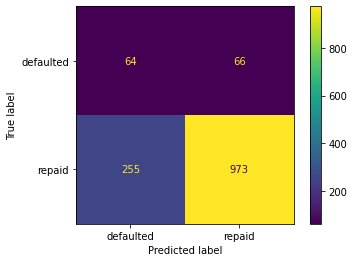

In [241]:
color = 'white'
matrix = confusion_matrix(y[6000:], result[0]['result'])

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=result[1].classes_)
disp.plot()
plt.show()